In [3]:
from papilion import PapilionDataset
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms

Dataset files present and verified


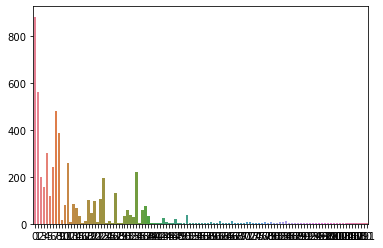

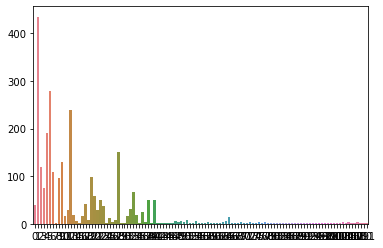

train data mean resolution:  nan  test data mean resolution:  nan


/Users/daan/miniforge3/envs/DatasetReduction/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daan/miniforge3/envs/DatasetReduction/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
pap = PapilionDataset(
    root="~/data", train=True)

In [13]:
pap._train_data[0].shape
# calculate the mean image resolution of the trainig images
res = []
for img in pap._train_data:
    res.append(img.shape)
print("train data mean resolution: ", np.mean(res, axis=0))

train data mean resolution: {} w by {} h  [531.84154292 570.98478812   3.        ]


Dataset files present and verified


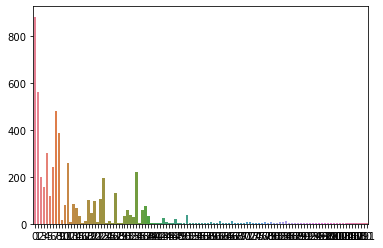

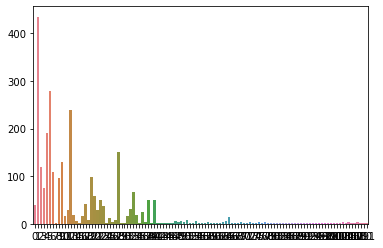

train data mean resolution:  nan  test data mean resolution:  nan


/Users/daan/miniforge3/envs/DatasetReduction/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daan/miniforge3/envs/DatasetReduction/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

pap_train = PapilionDataset(
    root="~/data", train=True, transform=transform)
image_data_loader = DataLoader(
    pap_train,
    # batch size is whole dataset
    batch_size=len(pap_train),
    shuffle=False,
    num_workers=0)


In [6]:
# calculating normalization parameters

images, _ = next(iter(image_data_loader))
# images = images.numpy()
print(images.shape)
# shape of images = [b,c,w,h]
mean, std = images.mean([0, 2, 3]), images.std([0, 2, 3])

torch.Size([5522, 3, 224, 224])


In [7]:
print(mean, std)

tensor([0.6209, 0.6052, 0.5562]) tensor([0.2183, 0.2803, 0.3155])


In [13]:
print('num classes in pap_train._train_labels: ', len(set(pap_train._train_labels)))

num classes in pap_train._train_labels:  112
